# 1. Load tree

We first load the tree (newick format) which was downloaded from the website <https://filogeneti.ca/covizu/>.

In [1]:
library(ape)
library(ggtree)
library(treeio)
library(tidyverse)
library(dplyr)

tree <- read.newick("timetree.nwk")

tree

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.0  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628




Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate


treeio v1.18.0


Phylogenetic tree with 1720 tips and 517 internal nodes.

Tip labels:
  XS, XF, BA.1.10, BA.1.13.1, BA.1.7, BA.1.12, ...
Node labels:
  NODE_0000001, NODE_0000458, NODE_0000459, NODE_0000460, NODE_0000462, NODE_0000465, ...

Rooted; includes branch lengths.

# 2. Load metadata

Next we load some metadata from a CSV file, also downloaded from.

In [2]:
metadata_df <- read.table("lineage_stats.csv", header=TRUE, sep=",")

metadata_df$min.coldate <- as.Date(metadata_df$min.coldate, format = "%Y-%m-%d")
metadata_df$max.coldate <- as.Date(metadata_df$max.coldate, format = "%Y-%m-%d")
metadata_df$mean.coldate <- as.Date(metadata_df$mean.coldate, format = "%Y-%m-%d")

head(metadata_df)

,lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate
,<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>
1,XS,69.71,16.42,21,9,2022-01-19,2022-03-07,2022-02-21
2,XF,64.24,12.62,21,7,2022-01-13,2022-02-14,2022-01-26
3,BA.1.10,63.62,11.90,856,545,2021-11-26,2022-03-31,2022-01-28
4,BA.1.13.1,66.24,14.35,1542,882,2021-12-12,2022-04-10,2022-01-31
5,BA.1.7,63.52,12.02,177,109,2021-12-11,2022-03-15,2022-01-25
6,BA.1.12,64.87,13.26,915,570,2021-11-22,2022-04-25,2022-01-26


# 3. Add additional metadata

Now we add some additional metadata which will help in visualizing the tree.

## 3.1. Add node IDs

First we add a column to the table with the node IDs derived from the tree for each lineage.

In [3]:
tree_labels <- metadata_df$lineage
node_ids <- nodeid(tree, tree_labels)

lineage_df <- cbind(metadata_df, node_ids)
lineage_df

lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate,node_ids
<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>,<int>
XS,69.71,16.42,21,9,2022-01-19,2022-03-07,2022-02-21,1
XF,64.24,12.62,21,7,2022-01-13,2022-02-14,2022-01-26,2
BA.1.10,63.62,11.90,856,545,2021-11-26,2022-03-31,2022-01-28,3
BA.1.13.1,66.24,14.35,1542,882,2021-12-12,2022-04-10,2022-01-31,4
BA.1.7,63.52,12.02,177,109,2021-12-11,2022-03-15,2022-01-25,5
BA.1.12,64.87,13.26,915,570,2021-11-22,2022-04-25,2022-01-26,6
BA.1.13,63.50,12.72,1342,998,2021-11-18,2022-04-22,2022-01-14,7
BA.1.17,63.78,11.68,24096,16024,2021-11-20,2022-05-11,2022-02-03,8
BA.1.17.2,65.52,13.48,67635,39398,2021-11-17,2022-05-20,2022-02-02,9


## 3.2. Add variant column

Now we add variant information to a separate column (e.g., Delta, Omicron, etc) based on the lineage identifiers. These are derived from <https://www.who.int/activities/tracking-SARS-CoV-2-variants> and <https://cov-lineages.org/lineage_list.html>.

In [4]:
is_delta <- str_detect(tree_labels, "^B\\.1\\.617\\.2$|^AY\\.")
is_omicron <- str_detect(tree_labels, "^B\\.1\\.1\\.529$|^BA\\.")
is_alpha <- str_detect(tree_labels, "^B\\.1\\.1\\.7$|^Q\\.")
is_beta <- str_detect(tree_labels, "^B\\.1\\.351$|^B\\.1\\.351\\.")
is_gamma <- str_detect(tree_labels, "^B\\.1\\.1\\.28$|P\\.")

lineage_df[is_delta, "Variant"] <- "Delta"
lineage_df[is_omicron, "Variant"] <- "Omicron"
lineage_df[is_alpha, "Variant"] <- "Alpha"
lineage_df[is_beta, "Variant"] <- "Beta"
lineage_df[is_gamma, "Variant"] <- "Gamma"

names(lineage_df)[names(lineage_df) == "node_ids"] <- "node"

table(lineage_df["Variant"])


  Alpha    Beta   Delta   Gamma Omicron 
      9       5     243      31      98 

In [5]:
na.omit(lineage_df[lineage_df["Variant"] == "Alpha",])

,lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate,node,Variant
,<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>,<int>,<chr>
1549,Q.2,42.37,9.52,1003,476,2020-12-16,2022-05-06,2021-04-15,1549,Alpha
1550,B.1.1.7,39.21,0.58,873018,431943,2020-11-24,2022-04-25,2021-07-12,1550,Alpha
1551,Q.1,36.73,3.37,5881,2806,2021-01-08,2021-07-30,2021-04-23,1551,Alpha
1552,Q.5,41.17,3.23,29,14,2021-06-28,2021-08-11,2021-07-02,1552,Alpha
1553,Q.4,39.54,7.15,1423,901,2021-01-10,2021-08-17,2021-04-08,1553,Alpha
1554,Q.3,41.21,7.52,3673,1883,2020-12-29,2021-09-17,2021-04-28,1554,Alpha
1555,Q.7,43.37,10.00,731,397,2021-01-29,2021-11-04,2021-04-23,1555,Alpha
1556,Q.6,41.14,4.65,126,80,2021-03-02,2021-08-12,2021-06-10,1556,Alpha
1557,Q.8,41.21,4.43,222,204,2021-03-07,2021-10-30,2021-06-14,1557,Alpha


# 4. Join metadata to tree

Now we join the metadata to the tree (by the node identifiers column) so we can more easily colour or modify the appearance of the leaves based on the metadata.

In [6]:
tree_metadata <- full_join(tree, lineage_df, by = "node")
tree_metadata

'treedata' S4 object'.

...@ phylo:

Phylogenetic tree with 1720 tips and 517 internal nodes.

Tip labels:
  XS, XF, BA.1.10, BA.1.13.1, BA.1.7, BA.1.12, ...
Node labels:
  NODE_0000001, NODE_0000458, NODE_0000459, NODE_0000460, NODE_0000462,
NODE_0000465, ...

Rooted; includes branch lengths.

with the following features available:
  'lineage', 'mean.diffs', 'clock.residual', 'num.cases', 'num.variants',
'min.coldate', 'max.coldate', 'mean.coldate', 'Variant'.

# The associated data tibble abstraction: 2,237 × 12
# The 'node', 'label' and 'isTip' are from the phylo tree.
    node label    isTip lineage mean.diffs clock.residual num.cases num.variants
   <int> <chr>    <lgl> <chr>        <dbl>          <dbl>     <int>        <int>
 1     1 XS       TRUE  XS            69.7           16.4        21            9
 2     2 XF       TRUE  XF            64.2           12.6        21            7
 3     3 BA.1.10  TRUE  BA.1.10       63.6           11.9       856          545
 4     4 BA.1.13

# 5. Get most recent date for scaling by time

In [7]:
most_recent_date <- max(lineage_df[["min.coldate"]], na.rm = TRUE)

print(most_recent_date)
lineage_df[lineage_df[["min.coldate"]] == most_recent_date,]

[1] "2022-03-09"


,lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate,node,Variant
,<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>,<int>,<chr>
104,BA.2.9.1,79.07,21.93,323,134,2022-03-09,2022-05-18,2022-04-21,104,Omicron


# 6. Draw tree

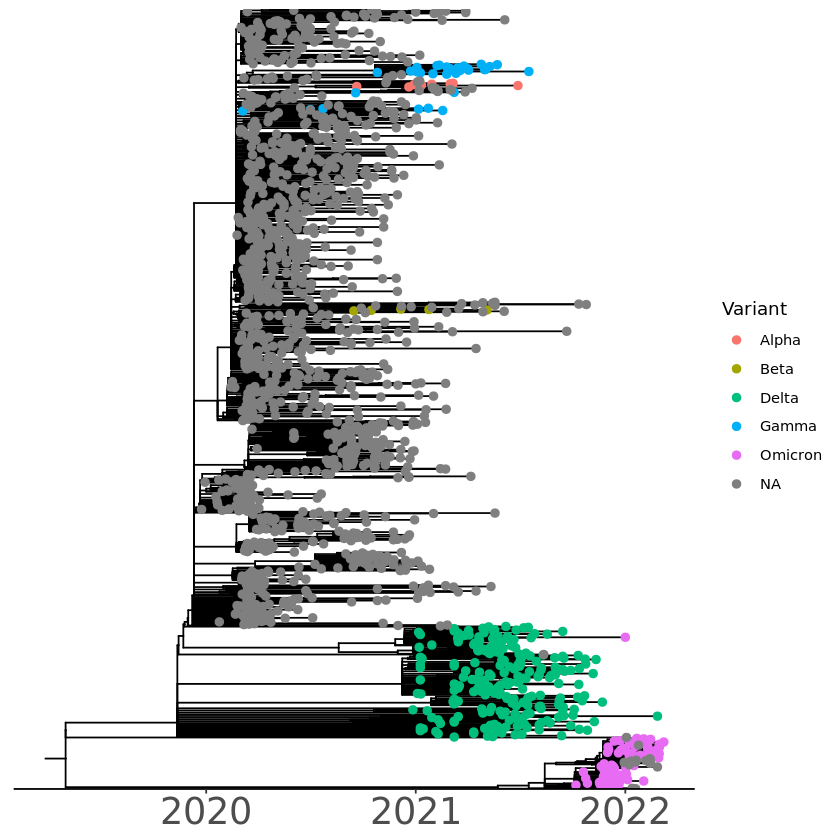

In [8]:
g <- ggtree(tree_metadata, mrsd=most_recent_date, ladderize=TRUE) +
         geom_tippoint(mapping=aes(color=Variant), size=2) +
         geom_rootedge(rootedge=0.1) +
         theme_tree2(axis.text.x=element_text(size=22))
g

# 7. Save figure to file

In [9]:
ggsave(filename="variants-tree.pdf") 

Saving 6.67 x 6.67 in image



# 8. Drop some tips from tree

In [10]:
tips_to_drop <- lineage_df[!(lineage_df$Variant %in% c("Alpha", "Beta")), "node"]
tips_to_drop

[1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182
 [183]  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 [197]  197  198  199  200  201  202  203  204  205  206  207  208  209  210
 [211]  211  212  213  214  215  216  217  218  219  220  221  222  223  224
 [225]  225  226  227  228  229  230  231  232  233  234  235  236  237  238
 [239]  239  240  241  242  243  244  245  246  247  248  249  250  251  252
 [253]  253  254  255  256  257  258  259  260  261  262  263  264  265  266
 [267]  267  268  269  270  271  272  273  274  275  276  277  278  279  280
 [281]  281  282  283  284  285  286  287  288  289  290  291  292  293  294
 [295]  295  296  297  298  299  300  301  302  303  304  305  306  307  308
 [309]  309  310  311  312  313  314  315  316  317  318  319  320  321  322
 [323]  323  324  325  326  327  328  329  330  331  332  333  334  335  336
 [337]  337  338  339  340  341  342  343  344  345  346  347  348  349  350
 [351]  351  352  353  354  355  356  357  358  359  360  361  362  363  364
 [365]  365  366  367  368  369  370  371  372  373  374  375  376  377  378
 [379]  379  380  381  382  383  384  385  386  387  388  389  390  391  392
 [393]  393  394  395  396  397  398  399  400  401  402  403  404  405  406
 [407]  407  408  409  410  411  412  413  414  415  416  417  418  419  420
 [421]  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [435]  435  436  437  438  439  440  441  442  443  444  445  446  447  448
 [449]  449  450  451  452  453  454  455  456  457  458  459  460  461  462
 [463]  463  464  465  466  467  468  469  470  471  472  473  474  475  476
 [477]  477  478  479  480  481  482  483  484  485  486  487  488  489  490
 [491]  491  492  493  494  495  496  497  498  499  500  501  502  503  504
 [505]  505  506  507  508  509  510  511  512  513  514  515  516  517  518
 [519]  519  520  521  522  523  524  525  526  527  528  529  530  531  532
 [533]  533  534  535  536  537  538  539  540  541  542  543  544  545  546
 [547]  547  548  549  550  551  552  553  554  555  556  557  558  559  560
 [561]  561  562  563  564  565  566  567  568  569  570  571  572  573  574
 [575]  575  576  577  578  579  580  581  582  583  584  585  586  587  588
 [589]  589  590  591  592  593  594  595  596  597  598  599  600  601  602
 [603]  603  604  605  606  607  608  609  610  611  612  613  614  615  616
 [617]  617  618  619  620  621  622  623  624  625  626  627  628  629  630
 [631]  631  632  633  634  635  636  637  638  639  640  641  642  643  644
 [645]  645  646  647  648  649  650  651  652  653  654  655  656  657  658
 [659]  659  660  661  662  663  664  665  666  667  668  669  670  671  672
 [673]  673  674  675  676  677  678  679  680  681  682  683  684  685  686
 [687]  687  688  689  690  691  692  693  694  695  696  697  698  699  700
 [701]  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [715]  715  716  717  718  719  720  721  722  723  724  725  726  727  728

In [11]:
subtree <- drop.tip(tree_metadata, tips_to_drop)
subtree

'treedata' S4 object'.

...@ phylo:

Phylogenetic tree with 14 tips and 9 internal nodes.

Tip labels:
  B.1.351.1, B.1.351, B.1.351.5, B.1.351.3, B.1.351.2, Q.2, ...
Node labels:
  NODE_0000406, NODE_0001228, NODE_0001229, NODE_0001230, NODE_0001231,
NODE_0000073, ...

Rooted; includes branch lengths.

with the following features available:
  'lineage', 'mean.diffs', 'clock.residual', 'num.cases', 'num.variants',
'min.coldate', 'max.coldate', 'mean.coldate', 'Variant'.

# The associated data tibble abstraction: 23 × 12
# The 'node', 'label' and 'isTip' are from the phylo tree.
    node label    isTip lineage mean.diffs clock.residual num.cases num.variants
   <int> <chr>    <lgl> <chr>        <dbl>          <dbl>     <int>        <int>
 1     1 B.1.351… TRUE  B.1.35…       26             5.38         2            2
 2     2 B.1.351  TRUE  B.1.351       28.9          -5.53     17461        11855
 3     3 B.1.351… TRUE  B.1.35…       33.1          -3.54       585          326
 4     4 B

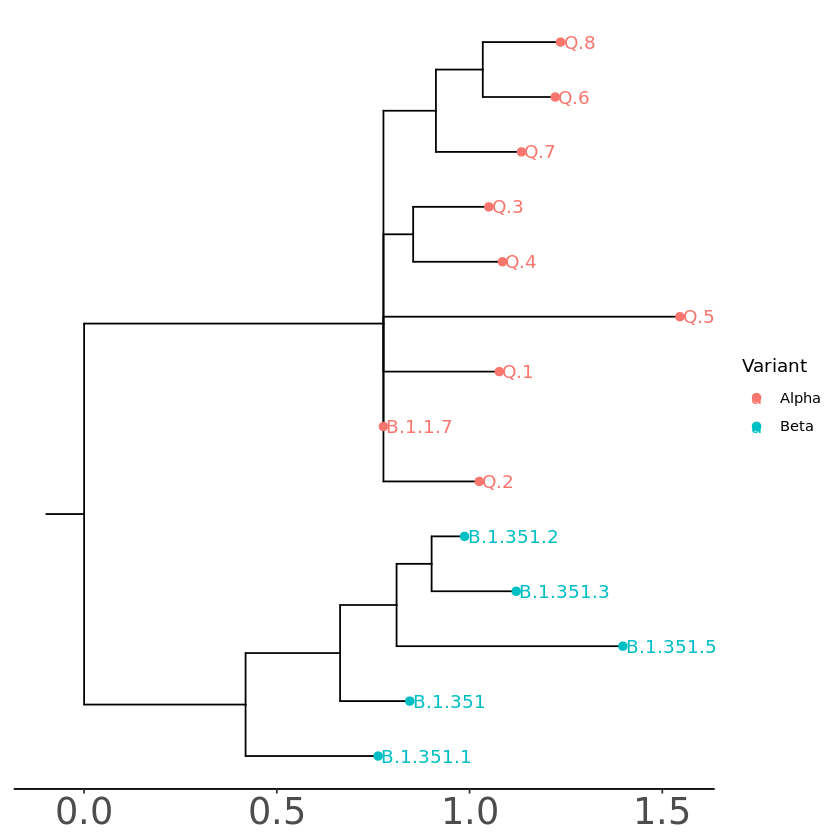

In [12]:
g <- ggtree(subtree, ladderize=TRUE) +
         geom_tippoint(mapping=aes(color=Variant), size=2) +
         geom_tiplab(mapping=aes(color=Variant), align=FALSE) +
         geom_rootedge(rootedge=0.1) +
         theme_tree2(axis.text.x=element_text(size=22))
g

In [13]:
ggsave(filename="variants-subtree.pdf") 

Saving 6.67 x 6.67 in image

